前面在计算多项式回归时，随着维度的增多，程序写起来也越来越麻烦。这一节我们使用 scikit-learn 来简化这个操作。

scikit-learn 简称 sklearn，它是 Python 语言里的一个通用机器学习库，里面包含了大量常用的机器学习方法，如分类，回归，无监督学习，降维，预处理等等。在前面求解线性回归问题时，我们使用了最原始的方法，手工推导出了用最小二乘法的解析解：

$$
\bf{a} = \rm{X}^{\dagger}\bf{y}
$$

这一节，我们使用 sklearn 自带的 `LinearRegression` 模块来求解线性回归。首先看一元的场景：

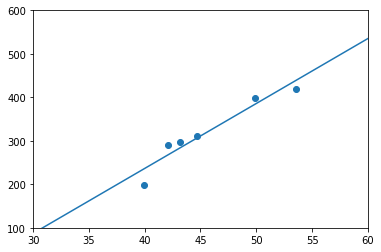

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.xlim(30, 60)
plt.ylim(100, 600)

X = np.array([39.93, 42.05, 43.18, 44.68, 49.87, 53.57]).reshape(-1, 1)
Y = np.array([199,   290,   298,   310,   399,   420]).reshape(-1, 1)
plt.scatter(X, Y)

model = LinearRegression()
model.fit(X, Y)
x = np.linspace(30, 60, 100).reshape(-1, 1)
y = model.predict(x)
plt.plot(x, y)

plt.show()

使用 sklearn 里的机器学习算法，都是同一个套路，先使用 `fit` 方法训练出模型，然后再使用模型的 `predict` 方法进行预测（注意输入的数据要使用 `reshape(-1, 1)` 转换为列向量）：

```
model = LinearRegression()
model.fit(X, Y)
x = ...
y = model.predict(x)
```

再来看看二元的场景：

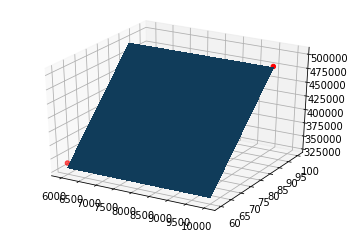

In [42]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
X = np.array([6000, 6000, 8000, 8000, 10000]).reshape(-1, 1)
Y = np.array([60, 80, 70, 100, 90]).reshape(-1, 1)
Z = np.array([340000, 350000, 400000, 450000, 500000]).reshape(-1, 1)
ax.scatter(X, Y, Z, c='red', marker='o')

model = LinearRegression()
XY = np.hstack([X, Y])
model.fit(XY, Z)
x = np.linspace(6000, 10000, 10).reshape(-1, 1)
y = np.linspace(60, 90, 10).reshape(-1, 1)
xy = np.hstack([x, y])
z = model.predict(xy)
x, y = np.meshgrid(x, y)
ax.plot_surface(x, y, z, linewidth=0, antialiased=False)

plt.show()

画出来的图形和前面的有一定的差异，这是因为数据量比较少，而且 sklearn 的线性回归使用的算法也不是我们前面介绍的正规解法，而是使用了梯度下降法（待验证）。不过 numpy 里提供了一个最小二乘方法 `lstsq`，我们可以验证下前面的求解结果对不对:

In [53]:
import numpy as np
from numpy.linalg import lstsq

np.set_printoptions(suppress=True)

X = np.matrix([
    [1, 1, 1, 1, 1], 
    [6000, 6000, 8000, 8000, 10000], 
    [60, 80, 70, 100, 90]]).T
Y = np.matrix([340000, 350000, 400000, 450000, 500000]).T

print(lstsq(X, Y, rcond=None)[0])

[[62105.26315789]
 [   32.10526316]
 [ 1273.68421053]]


同样，sklearn 也可以求解多项式回归，但是多项式回归其本质依然是线性回归，只是在做线性回归之前将入参从一维扩展到多维。我们使用 sklearn 预处理模块中的 `PolynomialFeatures.fit_transform()` 来完成这个转换。

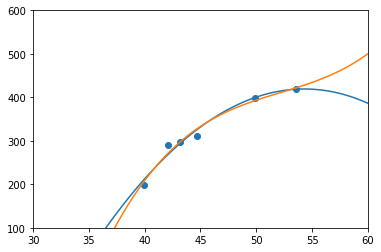

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

plt.xlim(30, 60)
plt.ylim(100, 600)

def draw_polynomial(X, Y, degree):
    polynomial = PolynomialFeatures(degree = degree)
    X_t = polynomial.fit_transform(X)
    model = LinearRegression()
    model.fit(X_t, Y)
    x = np.linspace(30, 60, 100).reshape(-1, 1)
    x_t = polynomial.fit_transform(x.reshape(x.shape[0], 1))
    y = model.predict(x_t)
    plt.plot(x, y)

X = np.array([39.93, 42.05, 43.18, 44.68, 49.87, 53.57]).reshape(-1, 1)
Y = np.array([199,   290,   298,   310,   399,   420]).reshape(-1, 1)
plt.scatter(X, Y)

# 二次回归
draw_polynomial(X, Y, 2)

# 三次回归
draw_polynomial(X, Y, 3)

plt.show()

也可以画出十次回归的曲线图：

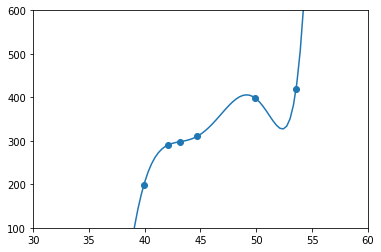

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

plt.xlim(30, 60)
plt.ylim(100, 600)

def draw_polynomial(X, Y, degree):
    polynomial = PolynomialFeatures(degree = degree)
    X_t = polynomial.fit_transform(X)
    model = LinearRegression()
    model.fit(X_t, Y)
    x = np.linspace(30, 60, 100).reshape(-1, 1)
    x_t = polynomial.fit_transform(x.reshape(x.shape[0], 1))
    y = model.predict(x_t)
    plt.plot(x, y)

X = np.array([39.93, 42.05, 43.18, 44.68, 49.87, 53.57]).reshape(-1, 1)
Y = np.array([199,   290,   298,   310,   399,   420]).reshape(-1, 1)
plt.scatter(X, Y)

# 十次回归
draw_polynomial(X, Y, 10)

plt.show()